In [276]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import time

import IPython.display as ipd
import librosa

import tensorflow.keras as keras
from tensorflow.keras.models import model_from_json

from sklearn.model_selection import train_test_split

In [273]:
%run helper_functions.py

In [266]:
def CNN(X, y, learning_rate=0.0001,test_size = 0.1,validation_size = 0.2):
    """
    create network topology, fit model and return it along with its information.
    X input data
    y output data ([0-10] classes)
    """
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = keras.Sequential()
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))
    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    #print model description
    model.summary()
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=BATCH_SIZE, epochs=EPOCHS)
    return (model, history)

In [ ]:
X_original, y_original, y_label = load_data(DATASET_PATH)
print("original X shape : {} \noriginal y shape {}".format(X_original.shape, y_original.shape))

In [57]:
X, y = make_ten_classes_data(X_original, y_original)
print("X shape for 10-classes: {} \ny shape for 10-classes {} with values in [0-10]".format(X.shape, y.shape))

X shape for 10-classes: (3404, 323, 13) 
y shape for 10-classes (3404,) with values in [0-10]


In [39]:
models = {}
tstart = time.time()

for i in range(len(LEARNING_RATES)):
    models[i] = CNN(X, y, learning_rate=LEARNING_RATES[i], test_size=TEST_SIZE, validation_size=VALIDATION_SIZE)

tend = time.time()
print("\nExecution time :{}".format(tend-tstart))

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 321, 11, 32)       320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 161, 6, 32)        0         
_________________________________________________________________
batch_normalization_30 (Batc (None, 161, 6, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 159, 4, 32)        9248      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 80, 2, 32)         0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 80, 2, 32)         128       
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 79, 1, 32)       

77/77 [==============================] - 5s 64ms/step - loss: 1017.0818 - accuracy: 0.3422 - val_loss: 5289681.0000 - val_accuracy: 0.1191
Epoch 2/30
77/77 [==============================] - 5s 62ms/step - loss: 1.9431 - accuracy: 0.4194 - val_loss: 65658.1719 - val_accuracy: 0.1077
Epoch 3/30
77/77 [==============================] - 5s 64ms/step - loss: 1.9332 - accuracy: 0.4357 - val_loss: 879.5515 - val_accuracy: 0.3540
Epoch 4/30
77/77 [==============================] - 5s 63ms/step - loss: 1.9071 - accuracy: 0.4310 - val_loss: 1.9447 - val_accuracy: 0.3980
Epoch 5/30
77/77 [==============================] - 5s 62ms/step - loss: 1.9315 - accuracy: 0.4342 - val_loss: 2.0312 - val_accuracy: 0.3980
Epoch 6/30
77/77 [==============================] - 5s 62ms/step - loss: 1.9659 - accuracy: 0.4406 - val_loss: 2.0981 - val_accuracy: 0.3980
Epoch 7/30
77/77 [==============================] - 5s 62ms/step - loss: 1.9623 - accuracy: 0.4381 - val_loss: 1.9846 - val_accuracy: 0.3980
Epoch 8/3

77/77 [==============================] - 5s 62ms/step - loss: 1.0749 - accuracy: 0.6319 - val_loss: 6.8991 - val_accuracy: 0.1794
Epoch 15/30
77/77 [==============================] - 5s 62ms/step - loss: 0.9926 - accuracy: 0.6685 - val_loss: 4.4351 - val_accuracy: 0.2773
Epoch 16/30
77/77 [==============================] - 5s 62ms/step - loss: 1.0237 - accuracy: 0.6327 - val_loss: 3.2004 - val_accuracy: 0.3573
Epoch 17/30
77/77 [==============================] - 5s 62ms/step - loss: 0.9082 - accuracy: 0.6786 - val_loss: 3.3268 - val_accuracy: 0.4078
Epoch 18/30
77/77 [==============================] - 5s 62ms/step - loss: 0.8401 - accuracy: 0.7042 - val_loss: 4.1128 - val_accuracy: 0.3622
Epoch 19/30
77/77 [==============================] - 5s 62ms/step - loss: 0.8134 - accuracy: 0.7110 - val_loss: 4.0427 - val_accuracy: 0.4046
Epoch 20/30
77/77 [==============================] - 5s 62ms/step - loss: 0.7748 - accuracy: 0.7303 - val_loss: 3.4078 - val_accuracy: 0.3181
Epoch 21/30
77/77 

77/77 [==============================] - 5s 62ms/step - loss: 0.0991 - accuracy: 0.9675 - val_loss: 4.2861 - val_accuracy: 0.4095
Epoch 28/30
77/77 [==============================] - 5s 62ms/step - loss: 0.0996 - accuracy: 0.9653 - val_loss: 5.0145 - val_accuracy: 0.4013
Epoch 29/30
77/77 [==============================] - 5s 62ms/step - loss: 0.1153 - accuracy: 0.9611 - val_loss: 4.1672 - val_accuracy: 0.3899
Epoch 30/30
77/77 [==============================] - 5s 62ms/step - loss: 0.1022 - accuracy: 0.9643 - val_loss: 3.9165 - val_accuracy: 0.3866
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 321, 11, 32)       320       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 161, 6, 32)        0         
_________________________________________________________________
batch_normalization_42 (B

77/77 [==============================] - 5s 63ms/step - loss: 2.8692 - accuracy: 0.1141 - val_loss: 2.2857 - val_accuracy: 0.1403
Epoch 2/30
77/77 [==============================] - 5s 62ms/step - loss: 2.8280 - accuracy: 0.1215 - val_loss: 2.3024 - val_accuracy: 0.1289
Epoch 3/30
77/77 [==============================] - 5s 62ms/step - loss: 2.7641 - accuracy: 0.1228 - val_loss: 2.3448 - val_accuracy: 0.1582
Epoch 4/30
77/77 [==============================] - 5s 62ms/step - loss: 2.7235 - accuracy: 0.1321 - val_loss: 2.3713 - val_accuracy: 0.1762
Epoch 5/30
77/77 [==============================] - 5s 63ms/step - loss: 2.6662 - accuracy: 0.1466 - val_loss: 2.3863 - val_accuracy: 0.1876
Epoch 6/30
77/77 [==============================] - 5s 62ms/step - loss: 2.6068 - accuracy: 0.1519 - val_loss: 2.3876 - val_accuracy: 0.1974
Epoch 7/30
77/77 [==============================] - 5s 62ms/step - loss: 2.5218 - accuracy: 0.1827 - val_loss: 2.3781 - val_accuracy: 0.2121
Epoch 8/30
77/77 [======

77/77 [==============================] - 5s 62ms/step - loss: 3.2892 - accuracy: 0.0680 - val_loss: 3.0522 - val_accuracy: 0.0897
Epoch 15/30
77/77 [==============================] - 5s 62ms/step - loss: 3.2351 - accuracy: 0.0886 - val_loss: 3.0451 - val_accuracy: 0.0914
Epoch 16/30
77/77 [==============================] - 5s 62ms/step - loss: 3.2411 - accuracy: 0.0793 - val_loss: 3.0360 - val_accuracy: 0.0897
Epoch 17/30
77/77 [==============================] - 5s 62ms/step - loss: 3.2091 - accuracy: 0.0866 - val_loss: 3.0258 - val_accuracy: 0.0897
Epoch 18/30
77/77 [==============================] - 5s 62ms/step - loss: 3.1872 - accuracy: 0.0901 - val_loss: 3.0164 - val_accuracy: 0.0914
Epoch 19/30
77/77 [==============================] - 5s 62ms/step - loss: 3.2221 - accuracy: 0.0837 - val_loss: 3.0085 - val_accuracy: 0.0930
Epoch 20/30
77/77 [==============================] - 5s 63ms/step - loss: 3.2354 - accuracy: 0.0790 - val_loss: 2.9998 - val_accuracy: 0.0930
Epoch 21/30
77/77 

77/77 [==============================] - 5s 65ms/step - loss: 3.3793 - accuracy: 0.0617 - val_loss: 3.0715 - val_accuracy: 0.0653
Epoch 28/30
77/77 [==============================] - 5s 62ms/step - loss: 3.3951 - accuracy: 0.0788 - val_loss: 3.0690 - val_accuracy: 0.0653
Epoch 29/30
77/77 [==============================] - 5s 63ms/step - loss: 3.3979 - accuracy: 0.0683 - val_loss: 3.0685 - val_accuracy: 0.0653
Epoch 30/30
77/77 [==============================] - 5s 62ms/step - loss: 3.3308 - accuracy: 0.0751 - val_loss: 3.0665 - val_accuracy: 0.0685

Execution time :1162.6805849075317


<b>The execution time for CNN model is about 20 minutes</b>

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [89]:
result = pd.DataFrame(columns=["Learning rate","Training Error","Training Accuracy","Test Error","Test Accuracy"])
for i in range(len(models)):
    in_training = models[i][0].evaluate(X_train, y_train, verbose=0)
    in_testing = models[i][0].evaluate(X_test, y_test, verbose=0)
    result.loc[i] = [LEARNING_RATES[i], in_training[0], in_training[1], in_testing[0], in_testing[1]]
    
result

,Learning rate,Training Error,Training Accuracy,Test Error,Test Accuracy
0,1.100000e+00,388.691956,0.418544,1.918931,0.504399
1,1.000000e+00,4444.644531,0.418544,156199.687500,0.501466
2,1.000000e-02,1.538228,0.744042,1.456768,0.733138
3,1.000000e-03,1.153334,0.823702,1.032425,0.818182
4,1.000000e-04,0.910758,0.780607,0.862551,0.803519
5,1.000000e-05,1.818360,0.417564,1.768774,0.445748
6,1.000000e-06,2.879302,0.083252,2.823290,0.120235
7,1.000000e-07,3.085929,0.070846,3.149771,0.061584


In [103]:
b_model = models[4]

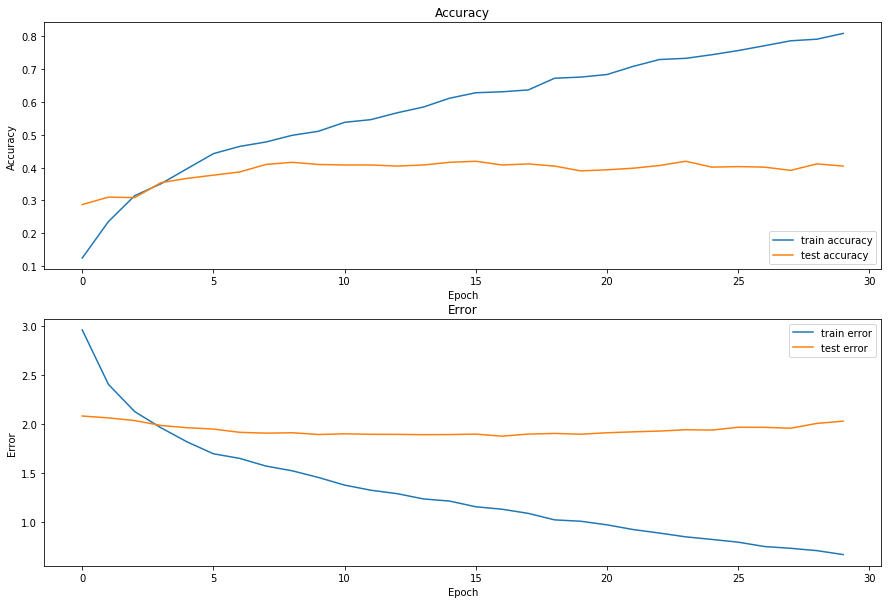

Test set accuracy: 80%


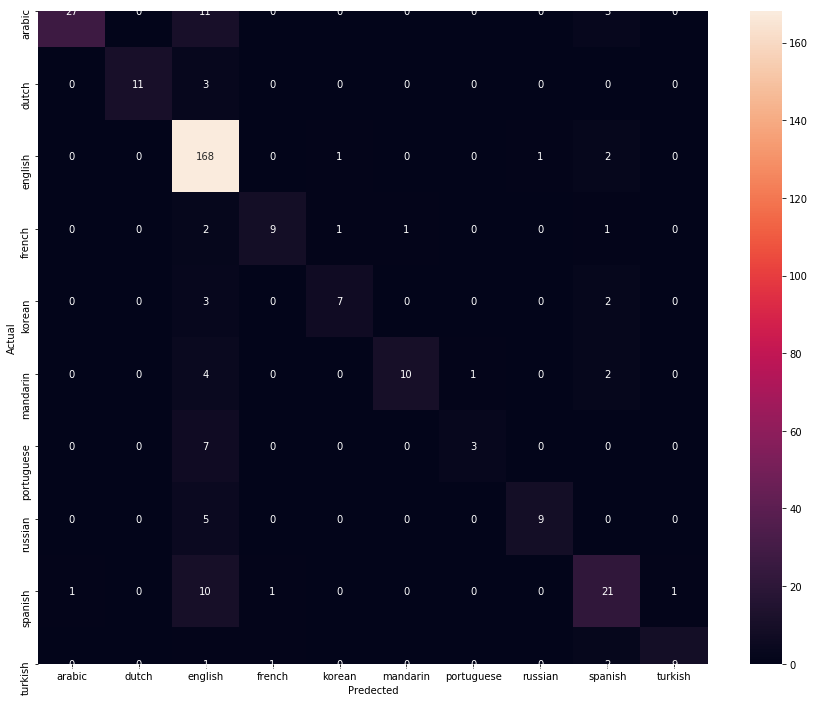

In [104]:
plot_hist(b_model[1])
conf_mat(b_model[0], X_test, y_test)

<h3>Text</h3>
<p><b>
Please call Stella.  Ask her to bring these things with her from the store:  
Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  
We also need a small plastic snake and a big toy frog for the kids.  
She can scoop these things into three red bags, and we will go meet her Wednesday at the train station.</b></p>

In [232]:
audio_path = 'recordings/wav/amazigh2.wav'
ipd.Audio(audio_path)

In [ ]:
predict(b_model[0], audio_path)

In [238]:
save_model(b_model[0], "CNN_model")

Done!


In [248]:
model = load_model("models/CNN_model.json", "models/CNN_model.h5")